### Importing libraries

In [219]:
%reset -f

from functions import *

import pickle

from sklearn.preprocessing import scale, StandardScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

%matplotlib inline
%autosave 300

Autosaving every 300 seconds


In [220]:
# Starting time
t0 = time()

input_path = "./dataset/cleaned/"
input_filename = "dataset_rfm.csv"

### Importing dataset

In [221]:
dataset_rfm = load_data(input_path, input_filename)

___Loading raw dataset___
Initial shape : (95420, 4)


In [222]:
dataset_rfm

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90
2,0000f46a3911fa3c0805444483337064,541,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00
...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,451,1,1570.00
95416,fffea47cd6d3cc0a88bd621562a9d061,266,1,64.89
95417,ffff371b4d645b6ecea244b27531430a,572,1,89.90
95418,ffff5962728ec6157033ef9805bacc48,123,1,115.00


In [223]:
X = dataset_rfm.drop("customer_unique_id", axis=1).copy()
X

,Recency,Frequency,Monetary
0,115,1,129.90
1,118,1,18.90
2,541,1,69.00
3,325,1,25.99
4,292,1,180.00
...,...,...,...
95415,451,1,1570.00
95416,266,1,64.89
95417,572,1,89.90
95418,123,1,115.00


#### Scaling

In [224]:
X_norm = X.copy()
X_norm[X_norm.columns] = scale(X)
print(X_norm.shape)

X_norm

(95420, 3)


,Recency,Frequency,Monetary
0,-0.833121,-0.161045,-0.057615
1,-0.813533,-0.161045,-0.567596
2,1.948293,-0.161045,-0.337415
3,0.537999,-0.161045,-0.535021
4,0.322537,-0.161045,0.172566
...,...,...,...
95415,1.360670,-0.161045,6.558813
95416,0.152779,-0.161045,-0.356298
95417,2.150696,-0.161045,-0.241392
95418,-0.780888,-0.161045,-0.126072


In [225]:
X_norm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Recency,95420.0,2.014970e-17,1.000005,-1.583972,-0.813533,-0.127974,0.714286,3.169242
Frequency,95420.0,1.407069e-15,1.000005,-0.161045,-0.161045,-0.161045,-0.161045,70.850618
Monetary,95420.0,-5.528194e-17,1.000005,-0.650525,-0.434358,-0.241392,0.057705,61.094607


___Density distribution___


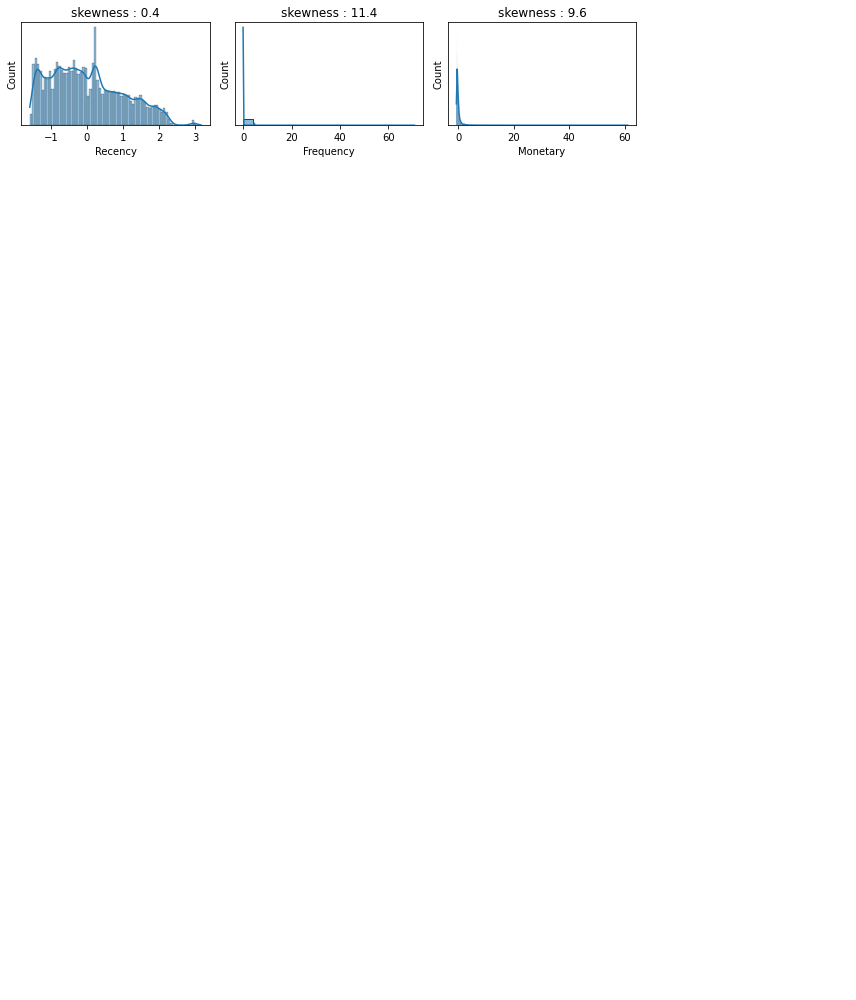

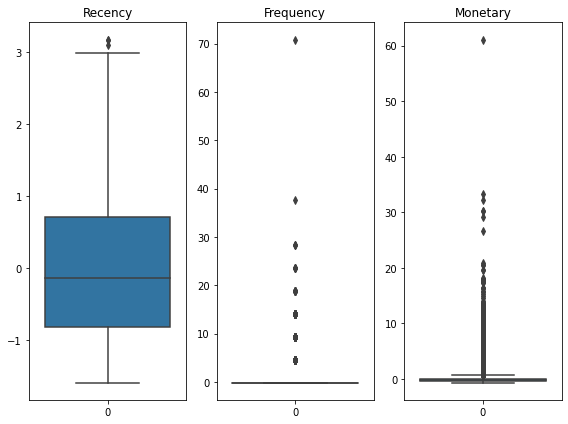

In [226]:
density_histplot(X_norm)
display_boxplot(X_norm)

#### Standardisation

In [227]:
X_std = X.copy()
scaler = StandardScaler()

X_std[X_std.columns] = scaler.fit_transform(X_std)
print(X_std.shape)

X_std

(95420, 3)


,Recency,Frequency,Monetary
0,-0.833121,-0.161045,-0.057615
1,-0.813533,-0.161045,-0.567596
2,1.948293,-0.161045,-0.337415
3,0.537999,-0.161045,-0.535021
4,0.322537,-0.161045,0.172566
...,...,...,...
95415,1.360670,-0.161045,6.558813
95416,0.152779,-0.161045,-0.356298
95417,2.150696,-0.161045,-0.241392
95418,-0.780888,-0.161045,-0.126072


In [228]:
X_std.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Recency,95420.0,2.014970e-17,1.000005,-1.583972,-0.813533,-0.127974,0.714286,3.169242
Frequency,95420.0,1.407069e-15,1.000005,-0.161045,-0.161045,-0.161045,-0.161045,70.850618
Monetary,95420.0,-5.528194e-17,1.000005,-0.650525,-0.434358,-0.241392,0.057705,61.094607


In [ ]:
density_histplot(X_std)
display_boxplot(X_std)

___Density distribution___


##### Verifying that scale and std scaler are the same here

In [ ]:
d = pd.concat([X_norm, X_std])
d

In [ ]:
d.drop_duplicates(keep=False)

##### ATTENTION : we use only 200 clients over 95000 for these tryouts

In [ ]:
X_norm_sample = X_norm.copy()
X_norm_sample = X_norm_sample.sample(n=5000, random_state=0, ignore_index=True) # we need to reset the index to get a box plot

X_norm_sample

In [ ]:
display_boxplot(X_norm_sample)
density_histplot(X_norm_sample)

### PCA : Principal Component Analysis

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_norm)
print(pca.explained_variance_ratio_.cumsum())

In [ ]:
plt.figure(figsize=(12,5))
plt.title('PCA : Cumulated sum of explained variance as a function of the number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulated variance explained')

plt.plot(np.arange(start=1, stop=pca.n_components + 1),
         np.cumsum(pca.explained_variance_ratio_))

In [ ]:
print("List of variance explained per component :", pca.explained_variance_ratio_)
print("Sum of the variance explained per component :", pca.explained_variance_ratio_.sum())

In [ ]:
# projeter X sur les composantes principales
X_pca = pca.transform(X_norm)
print("The PCA with 2 components explains", pca.explained_variance_ratio_.cumsum()[1], "% of the variance.")

In [ ]:
X_pca

##### projection

In [ ]:
pcs = pca.components_

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, X_norm.columns[i], fontsize='14')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])

In [ ]:
# sample :
pca_sample = PCA(n_components=2)
pca_sample.fit(X_norm_sample)
print(pca_sample.explained_variance_ratio_.cumsum())
X_pca_sample = pca_sample.transform(X_norm_sample)

### t-SNE

In [ ]:
tsne = TSNE(n_components=2, init='pca', learning_rate='auto')
X_tsne = tsne.fit_transform(X_norm_sample)

### K-Means Clustering

#### First tryout

In [ ]:
kmeans_cluster = KMeans(n_clusters=3, verbose=0, random_state=0)
kmeans_cluster.fit(X_norm_sample)

# kmeans_cluster.labels_

In [ ]:
kmeans_cluster.inertia_

In [ ]:
silh = silhouette_score(X_norm_sample, kmeans_cluster.labels_)
silh

##### Visualizing

In [ ]:
fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(121) # 1 en ordonnée / 2 en abcs / celle là la premiere
ax.scatter(x=X_pca_sample[:, 0], y=X_pca_sample[:, 1], c=kmeans_cluster.labels_) # colorier en fct etiquette deu clusterning
plt.title("Visualizing clusters with PCA")

ax = fig.add_subplot(122) # 1 en ordonnée / 2 en abcs / celle là la premiere
ax.scatter(x=X_tsne[:,0], y=X_tsne[:,1], c=kmeans_cluster.labels_) # palette=sns.color_palette("hls", n_colors=num_clusters)
plt.title('Principal Components projection with t-SNE')


In [ ]:
plt.figure(figsize=(12, 5))

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x=X_pca_sample[:, 0], y=X_pca_sample[:, 1],
    hue=kmeans_cluster.labels_,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x=X_tsne[:,0], y=X_tsne[:,1],
    hue=kmeans_cluster.labels_,
    ax=ax2
)

#### Searching the best number of clusters K

In [ ]:
inertia = {}
dict_kmeans = {}

for num_clusters in range(1, 25):
    print("\n\nTrying K =", num_clusters, end='\n')
    kmeans_cluster = KMeans(n_clusters=num_clusters,
                    verbose=1,
                    random_state=0).fit(X_norm_sample)
    inertia[num_clusters] = kmeans_cluster.inertia_
    dict_kmeans[num_clusters] = kmeans_cluster

In [ ]:
inertia

In [ ]:
print("K-Means minimises the inertia / intra-custer Variance.")

plt.figure(figsize=(8, 5))
plt.title('K-Means: The sum of inertia as a function of the number of clusters.')
sns.lineplot(x=list(inertia.keys()), y=list(inertia.values()))

In [ ]:
silhouettes = []
for num_clusters in range(2, 25):
    cls = KMeans(n_clusters=num_clusters, random_state=0) # #init='random', n_init=1)
    cls.fit(X_norm_sample)
    silh = silhouette_score(X_norm_sample, cls.labels_)
    silhouettes.append(silh)

print("We want the silhouette score to be close to 1.")
plt.plot(range(2, 25), silhouettes, marker='o')

### Hierarchical clustering

In [ ]:
hierarchical_cls = AgglomerativeClustering().fit(X_norm_sample) # n_clusters=5

In [ ]:
hierarchical_cls

In [ ]:
hierarchical_cls.labels_

In [ ]:
hierarchical_cls.n_clusters

In [ ]:
fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(121) # 1 en ordonnée / 2 en abcs / celle là la premiere
ax.scatter(x=X_pca_sample[:, 0], y=X_pca_sample[:, 1], c=hierarchical_cls.labels_) # colorier en fct etiquette deu clusterning
plt.title("Visualizing clusters with PCA")

ax = fig.add_subplot(122) # 1 en ordonnée / 2 en abcs / celle là la premiere
ax.scatter(x=X_tsne[:,0], y=X_tsne[:,1], c=hierarchical_cls.labels_) # palette=sns.color_palette("hls", n_colors=num_clusters)
plt.title('Principal Components projection with t-SNE')


In [ ]:
silhouette_score(X_norm_sample, hierarchical_cls.labels_)

### Segmentation : RFM Score (Giving a rank to each customer based on RFM using K-Means)

##### Clustering RFM variables using K-Means

In [ ]:
kmeans_cluster = KMeans(n_clusters=4, random_state=0)

In [ ]:
rfm_columns = ['Recency','Frequency','Monetary']

In [ ]:
rfm_clustering = apply_kmeans_per_column(dataset_rfm, rfm_columns, kmeans_cluster, n_clusters=4)

In [ ]:
display(rfm_clustering)

##### Segmentation as a function of RFM criteria : getting ideas

In [ ]:
#rfm_clustering["RFM_score"] = rfm_clustering["Recency_cluster"] * 100 + rfm_clustering["Frequency_cluster"] * 10 + rfm_clustering["Monetary_cluster"]
rfm_clustering['RFM_score'] = rfm_clustering.Recency_cluster.astype(str) + rfm_clustering.Frequency_cluster.astype(str) + rfm_clustering.Monetary_cluster.astype(str)

display(rfm_clustering)

In [ ]:
rfm_clustering[["RFM_score"]].value_counts()

In [ ]:
print("We have {} combinaisons possible here.".format(rfm_clustering["RFM_score"].nunique()))

n_clusters = 4
rfm_variables = 3
print("In theory, we would have {} combinaisons.".format(n_clusters ** rfm_variables))

In [ ]:
data = rfm_clustering['RFM_score']

fig = plt.figure(figsize=(12, 5))
data.value_counts().plot(kind='bar');

##### Specifying each cluster with describe

In [ ]:
description_clustering = rfm_clustering.copy()

for i, rfm_variable in enumerate(["Recency", "Frequency", "Monetary"]):
    for j, rfm_cluster in enumerate(["Recency_cluster", "Frequency_cluster", "Monetary_cluster"]):
        if i == j:
            display(description_clustering[[rfm_cluster, rfm_variable]].groupby(rfm_cluster).describe())

In [ ]:
recency_dict = {
    0: "two_years_ago_",
    1: "last_year_",
    2: "4-6_months_ago_",
    3: "0_4_months_ago_"
}

frequency_dict = {
    0: "1_order_",
    1: "2_orders_",
    2: "3_to_4_orders_",
    3: "more_than_5_orders_"
}

# 1 euro = 0.2 BRL
monetary_dict = {
    0: "up_to_176_BRL",
    1: "up_to_551_BRL",
    2: "up_to_1521_BRL",
    3: "up_to_13440_BRL"
}

##### Segmentation

In [ ]:
rfm_clustering['Classification'] = 'none'

#filter_ = (rfm_clustering['Classification'] == 'none')

# Most present type of customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 2) & # bought recently
                   (rfm_clustering['Frequency_cluster'] == 0) & # bought cheap stuff
                   (rfm_clustering['Monetary_cluster'] == 0) # bought once
                   & (rfm_clustering['Classification'] == 'none'), # so that we won't over write classification
                   'Classification'] = recency_dict[2]  + frequency_dict[0] + monetary_dict[0]

# Most present type of customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 3) & # bought recently
                   (rfm_clustering['Frequency_cluster'] == 0) & # bought cheap stuff
                   (rfm_clustering['Monetary_cluster'] == 0)
                    & (rfm_clustering['Classification'] == 'none'), # bought once
                   'Classification'] = recency_dict[3]  + frequency_dict[0] + monetary_dict[0]

# Most present type of customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 1) &
                   (rfm_clustering['Frequency_cluster'] == 0) & # bought cheap stuff
                   (rfm_clustering['Monetary_cluster'] == 0)  # bought once
                   & (rfm_clustering['Classification'] == 'none'),
                   'Classification'] = recency_dict[1]  + frequency_dict[0] + monetary_dict[0]

# Most present type of customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 0) &
                   (rfm_clustering['Frequency_cluster'] == 0) & # bought cheap stuff
                   (rfm_clustering['Monetary_cluster'] == 0)  # bought once
                   & (rfm_clustering['Classification'] == 'none') ,
                   'Classification'] = recency_dict[0]  + frequency_dict[0] + monetary_dict[0]


#Lowest-spending only_bought_once customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] <= 1) & # bought recently or not sooo long ago
                   (rfm_clustering['Frequency_cluster'] == 0) & # bought once
                   (rfm_clustering['Monetary_cluster'] <= 1)  # bought cheap stuff
                   & (rfm_clustering['Classification'] == 'none'),
                   'Classification'] = recency_dict[1]  + frequency_dict[0] + monetary_dict[1]


In [ ]:
#Best Customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 3)
                   & (rfm_clustering['Frequency_cluster'] == 3)
              & (rfm_clustering['Monetary_cluster'] == 3)#, #
                & (rfm_clustering['Classification'] == 'none'),
              'Classification'] = 'top_customer'

#High-spending New Customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 3) &
              (rfm_clustering['Frequency_cluster'] == 0) &
              (rfm_clustering['Monetary_cluster'] == 3)#, #
                  & (rfm_clustering['Classification'] == 'none'),
              'Classification'] = 'high_spending_new_customer'

#Lowest-spending active loyal customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] != 0) &
                   (rfm_clustering['Frequency_cluster'] > 0) &
              (rfm_clustering['Monetary_cluster'] < 2)#, #
                  & (rfm_clustering['Classification'] == 'none'),
              'Classification'] = 'low_spending_loyal_customer'

#Churned Best Customers
rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 0)
              & (rfm_clustering['Frequency_cluster'] > 1)
                   & (rfm_clustering['Monetary_cluster'] == 3) #, #
                   & (rfm_clustering['Classification'] == 'none'),
              'Classification'] = 'churned_top_customer'

In [ ]:
data = rfm_clustering['Classification']

data.value_counts()

In [ ]:
data.value_counts().plot(kind='bar');

In [ ]:
print("To get a segmentation idea")
rfm_clustering[rfm_clustering['Classification'] == 'none']

#### Customer Personas

https://ironfocus.com/blog/rfm-analysis-how-to-increase-your-sales/

In [ ]:
personas = {
    "Brand Champion": {"R": 3, "F": 3, "M": 3},
    "Loyal Customers": {"R": 3, "F": 3, "M": 2},

    "Possibly Alienated_1": {"R": 0, "F": 2, "M": None},
    "Possibly Alienated_2": {"R": 0, "F": 3, "M": None},

    "Possibly Alienated_3": {"R": 1, "F": 2, "M": None},
    "Possibly Alienated_4": {"R": 1, "F": 3, "M": None},

    "New Customers": {"R": 3, "F": 0, "M": None},
    "One-off big spenders": {"R": 0, "F": 0, "M": 3},
    "Expired leads": {"R": 0, "F": 0, "M": 0},
}

In [ ]:
rfm_clustering['Persona'] = 'none'

rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 3)
                   & (rfm_clustering['Frequency_cluster'] == 3)
                   & (rfm_clustering['Monetary_cluster'] == 3)
                   & (rfm_clustering['Persona'] == 'none'),
                   'Persona'] = 'Brand Champion'

rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 3)
                   & (rfm_clustering['Frequency_cluster'] == 3)
                   & (rfm_clustering['Monetary_cluster'] == 2)
                   & (rfm_clustering['Persona'] == 'none'),
                   'Persona'] = 'Loyal Customers'

rfm_clustering.loc[(rfm_clustering['Recency_cluster'] <= 1) #| (rfm_clustering['Recency_cluster'] == 1)) # 0 or 1
                   & ((rfm_clustering['Frequency_cluster'] == 2) | (rfm_clustering['Frequency_cluster'] == 3))
                   & (rfm_clustering['Persona'] == 'none'),
                   'Persona'] = 'Possibly Alienated'

rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 3) #| (rfm_clustering['Recency_cluster'] == 1)) # 0 or 1
                   & (rfm_clustering['Frequency_cluster'] == 0)
                   & (rfm_clustering['Persona'] == 'none'),
                   'Persona'] = 'New Customers'

rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 0)
                   & (rfm_clustering['Frequency_cluster'] == 0)
                   & (rfm_clustering['Monetary_cluster'] == 3)
                   & (rfm_clustering['Persona'] == 'none'),
                   'Persona'] = 'One-off big spenders'

rfm_clustering.loc[(rfm_clustering['Recency_cluster'] == 0)
                   & (rfm_clustering['Frequency_cluster'] == 0)
                   & (rfm_clustering['Monetary_cluster'] == 0)
                   & (rfm_clustering['Persona'] == 'none'),
                   'Persona'] = 'Expired leads'

In [ ]:
data = rfm_clustering['Persona']

data.value_counts()

In [ ]:
data.value_counts().plot(kind='bar');

In [ ]:
# End of simulation time
t1 = time()
print("computing time : {:8.6f} sec".format(t1 - t0))
print("computing time : " + strftime('%H:%M:%S', gmtime(t1 - t0)))